In [ ]:
# –®–∞–≥ 1.1: –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ Google Drive
from google.colab import drive
drive.mount('/content/drive')

# –®–∞–≥ 1.2: –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ GPU
!nvidia-smi

# –®–∞–≥ 1.3: –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –ø—É—Ç–∏ –∫ –¥–∞—Ç–∞—Å–µ—Ç—É

import os
base_dataset_dir = "/content/drive/MyDrive/KazakhFoodDataset"

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –ø–∞–ø–∫–∞ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –∏ –≤—ã–≤–æ–¥–∏–º —Å–ø–∏—Å–æ–∫ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π (–Ω–∞–∑–≤–∞–Ω–∏—è –±–ª—é–¥)
if os.path.exists(base_dataset_dir):
    categories = os.listdir(base_dataset_dir)
    print("–ù–∞–π–¥–µ–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (–ø–∞–ø–∫–∏):")
    for cat in categories:
        print("-", cat)
else:
    print("–ü–∞–ø–∫–∞ —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º –Ω–µ –Ω–∞–π–¥–µ–Ω–∞. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –ø—É—Ç—å:", base_dataset_dir)

Mounted at /content/drive
Mon Mar 10 05:48:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+---------------------

In [ ]:
# –®–∞–≥ 1.4: (–û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ) –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ train, val –∏ test
# –ï—Å–ª–∏ —É –≤–∞—Å –¥–∞—Ç–∞—Å–µ—Ç –µ—â—ë –Ω–µ —Ä–∞–∑–±–∏—Ç, –≤—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–ª–µ–¥—É—é—â–∏–π –∫–æ–¥.
# –≠—Ç–æ —Å–æ–∑–¥–∞—Å—Ç –ø–∞–ø–∫–∏ data/train, data/val –∏ data/test –≤ –≤–∞—à–µ–º Google Drive.
import random
import shutil

# –ó–∞–¥–∞–µ–º –ø—É—Ç–∏ –¥–ª—è –Ω–æ–≤—ã—Ö —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
split_base_dir = "/content/drive/MyDrive/data"
train_dir = os.path.join(split_base_dir, "train")
val_dir   = os.path.join(split_base_dir, "val")
test_dir  = os.path.join(split_base_dir, "test")

# –°–æ–∑–¥–∞–µ–º –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏, –µ—Å–ª–∏ –∏—Ö –µ—â–µ –Ω–µ—Ç
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# –†–∞–∑–±–∏–≤–∞–µ–º –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å (–ø–∞–ø–∫—É) –Ω–∞ 70% train, 15% val, 15% test
for category in categories:
    category_path = os.path.join(base_dataset_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)

        train_split = int(0.7 * len(images))
        val_split   = int(0.85 * len(images))

        train_images = images[:train_split]
        val_images   = images[train_split:val_split]
        test_images  = images[val_split:]

        # –°–æ–∑–¥–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ train/val/test
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è —Ñ–∞–π–ª–æ–≤
        def copy_images(img_list, src_folder, dst_folder):
            for img in img_list:
                src_path = os.path.join(src_folder, img)
                dst_path = os.path.join(dst_folder, img)
                shutil.copy(src_path, dst_path)

        copy_images(train_images, category_path, os.path.join(train_dir, category))
        copy_images(val_images, category_path, os.path.join(val_dir, category))
        copy_images(test_images, category_path, os.path.join(test_dir, category))

print("–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.")
print("–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:", sum([len(os.listdir(os.path.join(train_dir, cat))) for cat in os.listdir(train_dir)]))
print("–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:", sum([len(os.listdir(os.path.join(val_dir, cat))) for cat in os.listdir(val_dir)]))
print("–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞:", sum([len(os.listdir(os.path.join(test_dir, cat))) for cat in os.listdir(test_dir)]))


–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.
–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: 6695
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: 1437
–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: 1447


In [ ]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é) –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),                      # –ü—Ä–∏–≤–æ–¥–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫ —Ä–∞–∑–º–µ—Ä—É 224x224
    transforms.RandomHorizontalFlip(),                  # –°–ª—É—á–∞–π–Ω–æ–µ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ
    transforms.RandomRotation(15),                      # –°–ª—É—á–∞–π–Ω–æ–µ –≤—Ä–∞—â–µ–Ω–∏–µ ¬±15¬∞
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # –ù–µ–±–æ–ª—å—à–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è —è—Ä–∫–æ—Å—Ç–∏ –∏ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–∞
    transforms.ToTensor(),                              # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ç–µ–Ω–∑–æ—Ä
    transforms.Normalize(mean=[0.485, 0.456, 0.406],     # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç—É ImageNet
                         std=[0.229, 0.224, 0.225])
])

# 2. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤ (–±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),                      # –ü—Ä–∏–≤–æ–¥–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫ —Ä–∞–∑–º–µ—Ä—É 224x224
    transforms.ToTensor(),                              # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ç–µ–Ω–∑–æ—Ä
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3. –ó–∞–¥–∞–µ–º –ø—É—Ç–∏ –∫ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è–º –æ–±—É—á–∞—é—â–µ–≥–æ, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤
train_dir = "/content/drive/MyDrive/data/train"
val_dir   = "/content/drive/MyDrive/data/val"
test_dir  = "/content/drive/MyDrive/data/test"

# 4. –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset   = datasets.ImageFolder(root=val_dir, transform=val_transforms)
test_dataset  = datasets.ImageFolder(root=test_dir, transform=val_transforms)

# –í—ã–≤–µ–¥–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–ª–∞—Å—Å–∞—Ö –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
print("–ö–ª–∞—Å—Å—ã:", train_dataset.classes)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ train:", len(train_dataset))
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ val:", len(val_dataset))
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ test:", len(test_dataset))

–ö–ª–∞—Å—Å—ã: ['aÃÅsip', 'bayÃÅyrsaq', 'beshbarmaq', 'irimshik', 'manty', 'naryn', 'nayÃÅryz_koÃÅje', 'orama', 'plain_soup', 'plov', 'qattama nan', 'qazy-qarta', 'qurt', 'qymyz', 'qyÃÅyrdaq', 'samsa', 'sheep_head', 'shelpek', 'shorpa', 'suÃÅzbe', 'taba-nan', 'talqan-jent']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ train: 6683
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ val: 1434
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ test: 1440


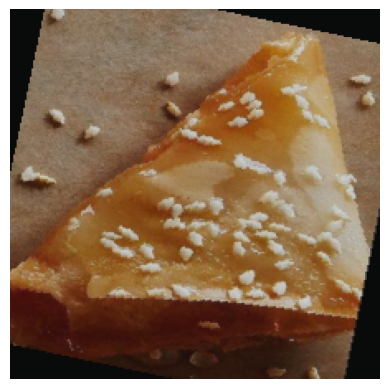

–ú–µ—Ç–∫–∞: samsa


In [ ]:
# 5. –°–æ–∑–¥–∞–µ–º DataLoader –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö –±–∞—Ç—á–∞–º–∏
batch_size = 32  # –ú–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ–±—ä–µ–º–∞ –ø–∞–º—è—Ç–∏ GPU

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 6. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (–¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –∑–∞–≥—Ä—É–∑–∫–∏)
def imshow(img):
    # –§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –≤–∏–¥ (–æ—Ç–º–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏)
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# 7. –ü—Ä–æ–≤–µ—Ä—è–µ–º DataLoader: –≤—ã–≤–æ–¥–∏–º –æ–¥–Ω–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(images[0])
print("–ú–µ—Ç–∫–∞:", train_dataset.classes[labels[0]])

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# –£–∫–∞–∑—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ (22 –±–ª—é–¥–∞)
num_classes = 22

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: GPU (–µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ) –∏–ª–∏ CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ ResNet50
model_resnet = models.resnet50(pretrained=True)
num_ftrs_resnet = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs_resnet, num_classes)
model_resnet = model_resnet.to(device)

# 2. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ EfficientNet-B0
model_efficientnet = models.efficientnet_b0(pretrained=True)
num_ftrs_efficientnet = model_efficientnet.classifier[1].in_features
model_efficientnet.classifier[1] = nn.Linear(num_ftrs_efficientnet, num_classes)
model_efficientnet = model_efficientnet.to(device)

# 3. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ VGG16
model_vgg = models.vgg16(pretrained=True)
num_ftrs_vgg = model_vgg.classifier[6].in_features
model_vgg.classifier[6] = nn.Linear(num_ftrs_vgg, num_classes)
model_vgg = model_vgg.to(device)

# 4. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ MobileNet_v2
model_mobilenet = models.mobilenet_v2(pretrained=True)
num_ftrs_mobilenet = model_mobilenet.classifier[1].in_features
model_mobilenet.classifier[1] = nn.Linear(num_ftrs_mobilenet, num_classes)
model_mobilenet = model_mobilenet.to(device)

# 5. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ DenseNet121
model_densenet = models.densenet121(pretrained=True)
num_ftrs_densenet = model_densenet.classifier.in_features
model_densenet.classifier = nn.Linear(num_ftrs_densenet, num_classes)
model_densenet = model_densenet.to(device)

print("–í—Å–µ 5 –º–æ–¥–µ–ª–µ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –∏ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω—ã –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ:", device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 120MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 

–í—Å–µ 5 –º–æ–¥–µ–ª–µ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –∏ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω—ã –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: cuda


In [ ]:
# –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
num_epochs = 15  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
batch_size = 32  # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
learning_rate = 0.0001  # –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è

In [ ]:
import torch.optim as optim

# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
optimizers = {
    "resnet50": optim.Adam(model_resnet.parameters(), lr=learning_rate),
    "efficientnet_b0": optim.Adam(model_efficientnet.parameters(), lr=learning_rate),
    "vgg16": optim.Adam(model_vgg.parameters(), lr=learning_rate),
    "mobilenet_v2": optim.Adam(model_mobilenet.parameters(), lr=learning_rate),
    "densenet121": optim.Adam(model_densenet.parameters(), lr=learning_rate),
}

In [ ]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # –û–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
        outputs = model(images)  # –ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥
        loss = criterion(outputs, labels)  # –í—ã—á–∏—Å–ª—è–µ–º –ø–æ—Ç–µ—Ä–∏
        loss.backward()  # –û–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏
        optimizer.step()  # –û–±–Ω–æ–≤–ª—è–µ–º –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(dataloader)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

In [ ]:
def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # –û—Ç–∫–ª—é—á–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(dataloader)
    val_accuracy = 100 * correct / total
    return val_loss, val_accuracy

In [ ]:
import copy

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_models = {}

for model_name, model in [("resnet50", model_resnet),
                          ("efficientnet_b0", model_efficientnet),
                          ("vgg16", model_vgg),
                          ("mobilenet_v2", model_mobilenet),
                          ("densenet121", model_densenet)]:

    optimizer = optimizers[model_name]
    best_val_acc = 0.0  # –î–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –ª—É—á—à–µ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    best_model_wts = copy.deepcopy(model.state_dict())

    print(f"\nüîπ –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ {model_name}...")

    for epoch in range(num_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        print(f"üîπ –≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –≤–µ—Ä—Å–∏—é –º–æ–¥–µ–ª–∏
    model.load_state_dict(best_model_wts)
    best_models[model_name] = model.state_dict()

    print(f"‚úÖ –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç {model_name}: {best_val_acc:.2f}%")


üîπ –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ resnet50...
üîπ –≠–ø–æ—Ö–∞ 1/15 | Train Loss: 0.7941, Train Acc: 77.57% | Val Loss: 0.3931, Val Acc: 87.66%
üîπ –≠–ø–æ—Ö–∞ 2/15 | Train Loss: 0.3289, Train Acc: 89.87% | Val Loss: 0.3169, Val Acc: 90.10%
üîπ –≠–ø–æ—Ö–∞ 3/15 | Train Loss: 0.2338, Train Acc: 92.50% | Val Loss: 0.2985, Val Acc: 90.38%
üîπ –≠–ø–æ—Ö–∞ 4/15 | Train Loss: 0.1869, Train Acc: 94.13% | Val Loss: 0.2426, Val Acc: 91.70%
üîπ –≠–ø–æ—Ö–∞ 5/15 | Train Loss: 0.1332, Train Acc: 95.89% | Val Loss: 0.2320, Val Acc: 92.96%
üîπ –≠–ø–æ—Ö–∞ 6/15 | Train Loss: 0.1171, Train Acc: 96.35% | Val Loss: 0.2350, Val Acc: 93.31%
üîπ –≠–ø–æ—Ö–∞ 7/15 | Train Loss: 0.0960, Train Acc: 97.07% | Val Loss: 0.2632, Val Acc: 92.33%
üîπ –≠–ø–æ—Ö–∞ 8/15 | Train Loss: 0.0993, Train Acc: 96.96% | Val Loss: 0.2897, Val Acc: 91.91%
üîπ –≠–ø–æ—Ö–∞ 9/15 | Train Loss: 0.0995, Train Acc: 96.83% | Val Loss: 0.2696, Val Acc: 92.05%
üîπ –≠–ø–æ—Ö–∞ 10/15 | Train Loss: 0.1014, Train Acc: 96.75% | Val Loss: 0.311

In [ ]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤—Å–µ –ª—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –≤ –æ–¥–∏–Ω —Ñ–∞–π–ª (—Å–ª–æ–≤–∞—Ä—å best_models)
import torch

save_path = "/content/drive/MyDrive/best_models.pth"  # –ü—É—Ç—å –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –Ω–∞ Google –î–∏—Å–∫–µ
torch.save(best_models, save_path)
print(f"–õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –ø–æ –∞–¥—Ä–µ—Å—É: {save_path}")

–õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –ø–æ –∞–¥—Ä–µ—Å—É: /content/drive/MyDrive/best_models.pth



--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: resnet50 ---
               precision    recall  f1-score   support

        aÃÅsip       0.94      0.76      0.84        21
    bayÃÅyrsaq       0.73      0.97      0.83        68
   beshbarmaq       0.89      0.96      0.92       116
     irimshik       0.95      0.95      0.95        96
        manty       0.93      0.98      0.95        63
        naryn       0.89      0.91      0.90        46
nayÃÅryz_koÃÅje       0.92      1.00      0.96        34
        orama       0.97      0.82      0.89        44
   plain_soup       0.98      0.89      0.93        62
         plov       0.98      0.98      0.98        99
  qattama nan       0.81      0.91      0.86        69
   qazy-qarta       0.77      0.79      0.78        34
         qurt       0.93      0.90      0.91        58
        qymyz       0.91      0.98      0.95        53
     qyÃÅyrdaq       0.97      0.85      0.90        67
        samsa       0.93      0.89      0.91       115

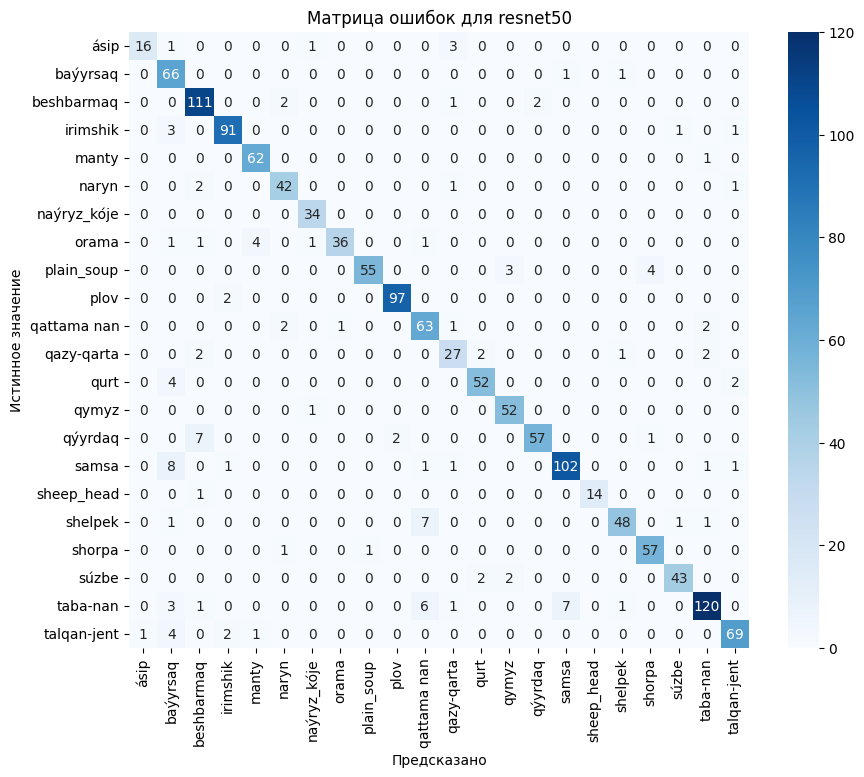


--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: efficientnet_b0 ---
               precision    recall  f1-score   support

        aÃÅsip       0.89      0.81      0.85        21
    bayÃÅyrsaq       0.90      0.96      0.93        68
   beshbarmaq       0.95      0.97      0.96       116
     irimshik       0.95      0.99      0.97        96
        manty       0.95      0.97      0.96        63
        naryn       0.96      0.98      0.97        46
nayÃÅryz_koÃÅje       0.94      1.00      0.97        34
        orama       0.93      0.84      0.88        44
   plain_soup       1.00      0.90      0.95        62
         plov       0.99      1.00      0.99        99
  qattama nan       0.88      0.88      0.88        69
   qazy-qarta       0.82      0.91      0.86        34
         qurt       0.89      0.97      0.93        58
        qymyz       0.96      0.98      0.97        53
     qyÃÅyrdaq       0.98      0.93      0.95        67
        samsa       0.98      0.93      0.96   

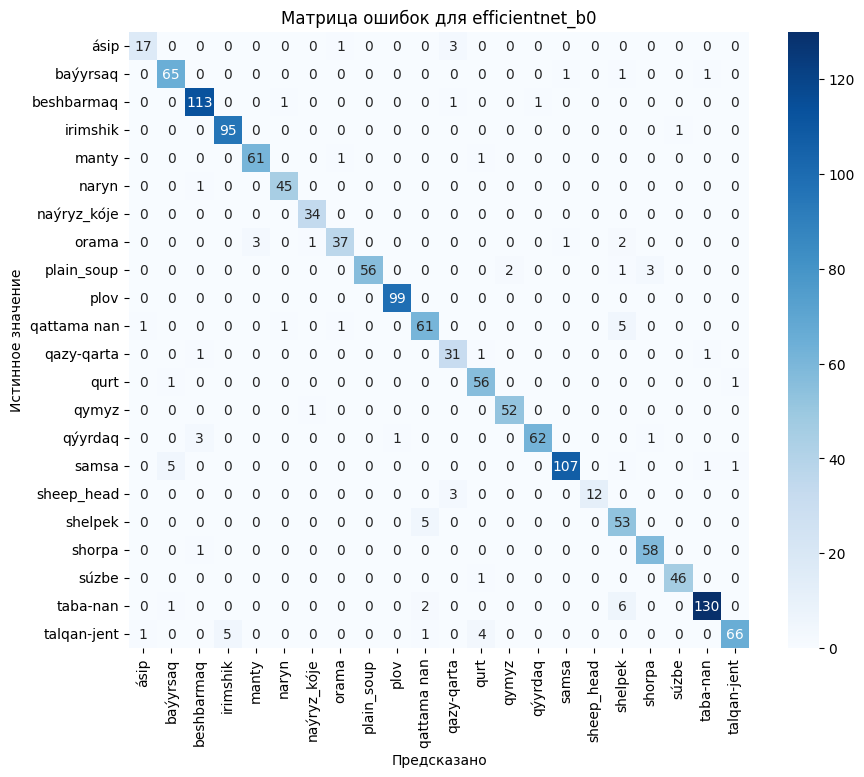


--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: vgg16 ---
               precision    recall  f1-score   support

        aÃÅsip       0.92      0.57      0.71        21
    bayÃÅyrsaq       0.83      0.96      0.89        68
   beshbarmaq       0.81      0.96      0.88       116
     irimshik       0.87      0.94      0.90        96
        manty       0.89      0.94      0.91        63
        naryn       1.00      0.91      0.95        46
nayÃÅryz_koÃÅje       0.89      0.94      0.91        34
        orama       0.79      0.61      0.69        44
   plain_soup       0.96      0.87      0.92        62
         plov       0.96      0.97      0.96        99
  qattama nan       0.82      0.88      0.85        69
   qazy-qarta       0.81      0.88      0.85        34
         qurt       0.83      0.98      0.90        58
        qymyz       0.88      0.96      0.92        53
     qyÃÅyrdaq       0.90      0.91      0.90        67
        samsa       0.93      0.89      0.91       115
  

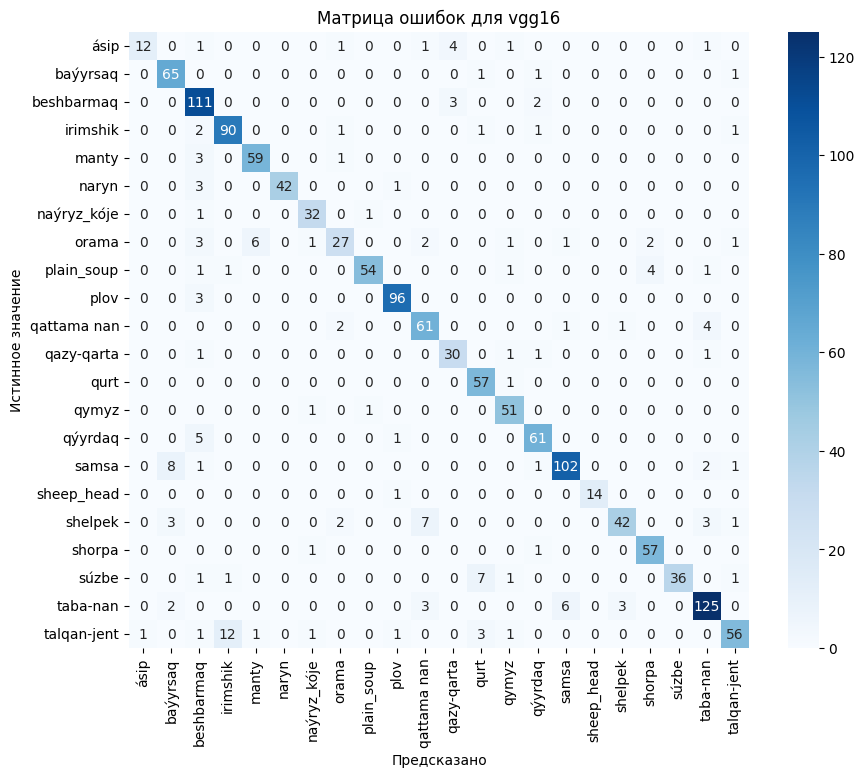


--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: mobilenet_v2 ---
               precision    recall  f1-score   support

        aÃÅsip       0.94      0.81      0.87        21
    bayÃÅyrsaq       0.94      0.93      0.93        68
   beshbarmaq       0.95      0.91      0.93       116
     irimshik       0.97      0.95      0.96        96
        manty       0.94      0.92      0.93        63
        naryn       0.83      0.98      0.90        46
nayÃÅryz_koÃÅje       0.94      1.00      0.97        34
        orama       0.92      0.82      0.87        44
   plain_soup       1.00      0.79      0.88        62
         plov       0.99      1.00      0.99        99
  qattama nan       0.82      0.91      0.86        69
   qazy-qarta       0.75      0.88      0.81        34
         qurt       0.83      0.98      0.90        58
        qymyz       0.91      0.98      0.95        53
     qyÃÅyrdaq       0.97      0.88      0.92        67
        samsa       0.95      0.97      0.96      

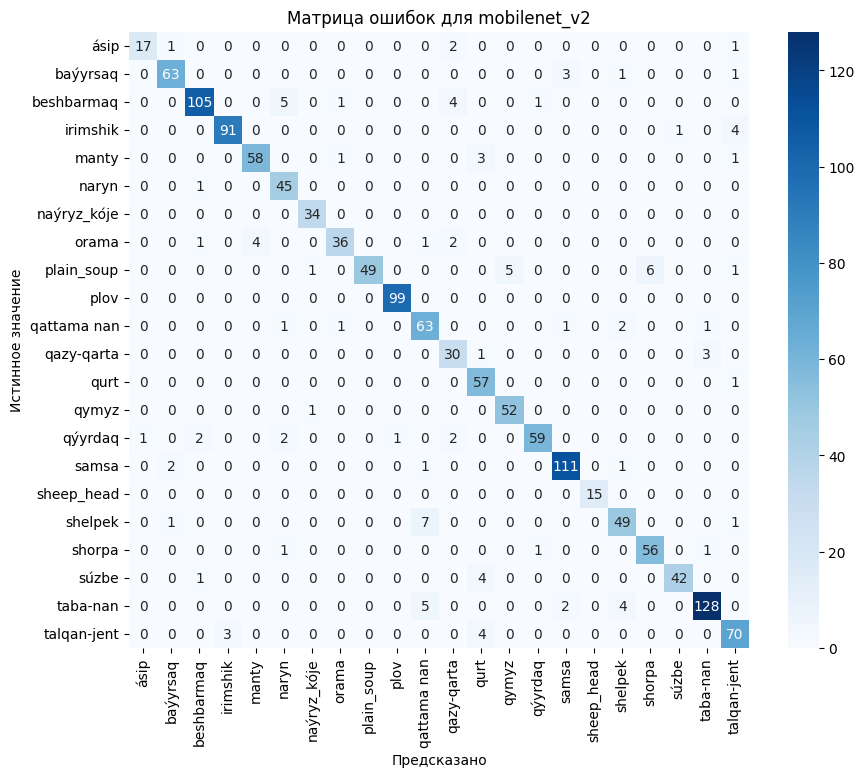


--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: densenet121 ---
               precision    recall  f1-score   support

        aÃÅsip       1.00      0.76      0.86        21
    bayÃÅyrsaq       0.84      0.96      0.90        68
   beshbarmaq       0.96      0.93      0.95       116
     irimshik       0.97      0.99      0.98        96
        manty       0.95      0.98      0.97        63
        naryn       0.92      0.96      0.94        46
nayÃÅryz_koÃÅje       0.94      1.00      0.97        34
        orama       0.95      0.86      0.90        44
   plain_soup       0.97      0.95      0.96        62
         plov       0.98      0.98      0.98        99
  qattama nan       0.89      0.93      0.91        69
   qazy-qarta       0.83      0.88      0.86        34
         qurt       0.93      0.95      0.94        58
        qymyz       0.96      0.98      0.97        53
     qyÃÅyrdaq       0.96      0.96      0.96        67
        samsa       0.98      0.95      0.96       

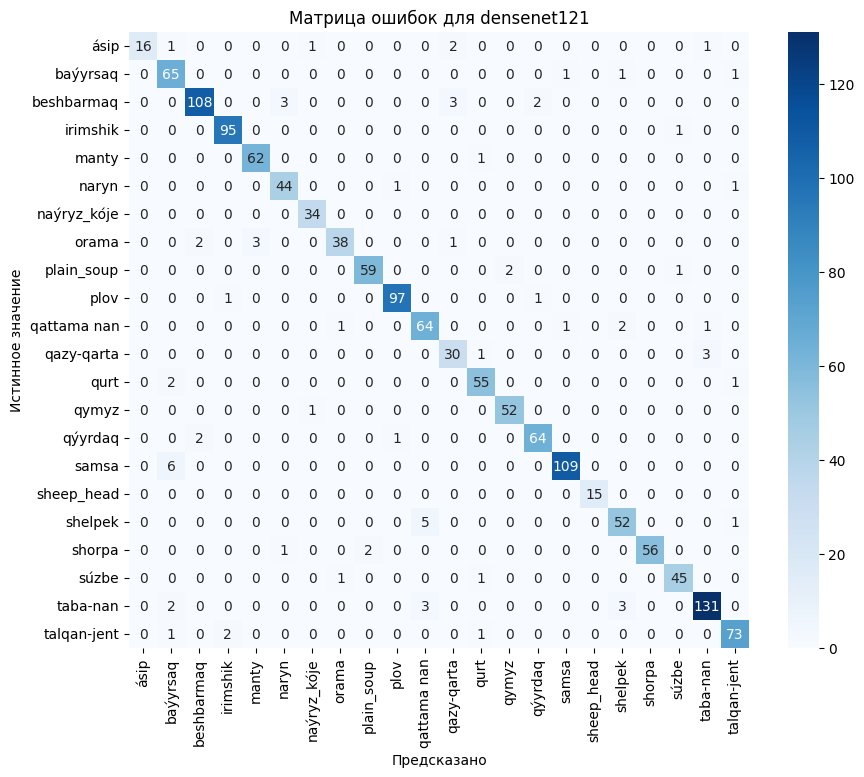

In [ ]:
# –®–∞–≥ 5: –û—Ü–µ–Ω–∫–∞ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# –°–ª–æ–≤–∞—Ä—å —Å –Ω–∞—à–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏ —Ä–∞–Ω–µ–µ
models_dict = {
    "resnet50": model_resnet,
    "efficientnet_b0": model_efficientnet,
    "vgg16": model_vgg,
    "mobilenet_v2": model_mobilenet,
    "densenet121": model_densenet,
}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
def evaluate_model(model, dataloader, device):
    model.eval()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# –û—Ü–µ–Ω–∫–∞ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –∏ –≤—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
for model_name, model in models_dict.items():
    # –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
    model.load_state_dict(best_models[model_name])

    # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
    true_labels, predictions = evaluate_model(model, test_loader, device)

    print(f"\n--- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: {model_name} ---")
    # –í—ã–≤–æ–¥–∏–º –æ—Ç—á—ë—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
    print(classification_report(true_labels, predictions, target_names=test_dataset.classes))

    # –í—ã—á–∏—Å–ª—è–µ–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=test_dataset.classes,
                yticklabels=test_dataset.classes)
    plt.title(f"–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –¥–ª—è {model_name}")
    plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ")
    plt.ylabel("–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ")
    plt.show()

In [ ]:
import torch.optim as optim

# 6.1. –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
# –ó–∞–≥—Ä—É–∂–∞–µ–º DenseNet121 –∏ –∑–∞–º–µ–Ω—è–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –¥–ª—è 22 –∫–ª–∞—Å—Å–æ–≤
model_finetune = models.densenet121(pretrained=False)
num_ftrs = model_finetune.classifier.in_features
model_finetune.classifier = nn.Linear(num_ftrs, num_classes)
# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ä–∞–Ω–µ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã–µ –ª—É—á—à–∏–µ –≤–µ—Å–∞ –¥–ª—è DenseNet121
model_finetune.load_state_dict(best_models["densenet121"])
model_finetune = model_finetune.to(device)

# 6.2. –†–∞–∑–±–ª–æ–∫–∏—Ä—É–µ–º –≤—Å–µ —Å–ª–æ–∏ –¥–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è
for param in model_finetune.parameters():
    param.requires_grad = True

# 6.3. –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä —Å –º–µ–Ω—å—à–µ–π —Å–∫–æ—Ä–æ—Å—Ç—å—é –æ–±—É—á–µ–Ω–∏—è –¥–ª—è fine-tuning
optimizer_finetune = optim.Adam(model_finetune.parameters(), lr=1e-5)
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–ª–∞–Ω–∏—Ä–æ–≤—â–∏–∫ (scheduler) –¥–ª—è –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_finetune, step_size=5, gamma=0.1)

# 6.4. –ó–∞–¥–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —ç–ø–æ—Ö –¥–æ–æ–±—É—á–µ–Ω–∏—è
num_finetune_epochs = 10

print("–ù–∞—á–∏–Ω–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –¥–æ–æ–±—É—á–µ–Ω–∏–µ (fine-tuning) DenseNet121...")

for epoch in range(num_finetune_epochs):
    train_loss, train_acc = train_one_epoch(model_finetune, train_loader, optimizer_finetune, criterion, device)
    val_loss, val_acc = validate(model_finetune, val_loader, criterion, device)
    scheduler.step()
    print(f"Fine-tune Epoch {epoch+1}/{num_finetune_epochs}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.2f}% | Val Loss {val_loss:.4f}, Val Acc {val_acc:.2f}%")

# –ü–æ—Å–ª–µ –¥–æ–æ–±—É—á–µ–Ω–∏—è –æ—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
true_labels, predictions = evaluate_model(model_finetune, test_loader, device)
print("–û—Ü–µ–Ω–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –ø–æ—Å–ª–µ fine-tuning:")
print(classification_report(true_labels, predictions, target_names=test_dataset.classes))

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–æ–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
finetuned_model_path = "/content/drive/MyDrive/best_model_finetuned.pth"
torch.save(model_finetune.state_dict(), finetuned_model_path)
print("Fine-tuned –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –ø–æ –∞–¥—Ä–µ—Å—É:", finetuned_model_path)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


–ù–∞—á–∏–Ω–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –¥–æ–æ–±—É—á–µ–Ω–∏–µ (fine-tuning) DenseNet121...
Fine-tune Epoch 1/10: Train Loss 0.0178, Train Acc 99.75% | Val Loss 0.1777, Val Acc 94.63%
Fine-tune Epoch 2/10: Train Loss 0.0150, Train Acc 99.73% | Val Loss 0.1760, Val Acc 94.70%
Fine-tune Epoch 3/10: Train Loss 0.0127, Train Acc 99.87% | Val Loss 0.1749, Val Acc 94.63%
Fine-tune Epoch 4/10: Train Loss 0.0106, Train Acc 99.87% | Val Loss 0.1697, Val Acc 95.12%
Fine-tune Epoch 5/10: Train Loss 0.0093, Train Acc 99.87% | Val Loss 0.1746, Val Acc 95.19%
Fine-tune Epoch 6/10: Train Loss 0.0087, Train Acc 99.88% | Val Loss 0.1649, Val Acc 94.98%
Fine-tune Epoch 7/10: Train Loss 0.0070, Train Acc 99.91% | Val Loss 0.1720, Val Acc 94.77%
Fine-tune Epoch 8/10: Train Loss 0.0086, Train Acc 99.90% | Val Loss 0.1725, Val Acc 95.05%
Fine-tune Epoch 9/10: Train Loss 0.0071, Train Acc 99.93% | Val Loss 0.1725, Val Acc 94.91%
Fine-tune Epoch 10/10: Train Loss 0.0080, Train Acc 99.91% | Val Loss 0.1694

In [ ]:
!pip install onnx

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.0/16.0 MB 89.3 MB/s eta 0:00:00


In [ ]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∏–∫—Ç–∏–≤–Ω–æ–≥–æ –≤—Ö–æ–¥–∞ (dummy input) –¥–ª—è —ç–∫—Å–ø–æ—Ä—Ç–∞
dummy_input = torch.randn(1, 3, 224, 224, device=device)

# –≠–∫—Å–ø–æ—Ä—Ç –º–æ–¥–µ–ª–∏ –≤ —Ñ–æ—Ä–º–∞—Ç ONNX
onnx_model_path = "/content/drive/MyDrive/best_model_finetuned.onnx"
torch.onnx.export(
    model_finetune,           # –Ω–∞—à–∞ –¥–æ–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
    dummy_input,              # –ø—Ä–∏–º–µ—Ä –≤—Ö–æ–¥–∞
    onnx_model_path,          # –ø—É—Ç—å –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
    input_names=["input"],    # –∏–º—è –≤—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–Ω–∑–æ—Ä–∞
    output_names=["output"],  # –∏–º—è –≤—ã—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–Ω–∑–æ—Ä–∞
    opset_version=11          # –≤–µ—Ä—Å–∏—è ONNX opset
)
print("–ú–æ–¥–µ–ª—å —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∞ –≤ ONNX –ø–æ –∞–¥—Ä–µ—Å—É:", onnx_model_path)


–ú–æ–¥–µ–ª—å —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∞ –≤ ONNX –ø–æ –∞–¥—Ä–µ—Å—É: /content/drive/MyDrive/best_model_finetuned.onnx
